# Proyecto ML

## Wikipedia Movie Plots

Importa las librarías que se usaran

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Carga los datos (se pueden bajar de aquí: https://www.kaggle.com/jrobischon/wikipedia-movie-plots)

In [2]:
df = pd.read_csv("wiki_movie_plots_deduped.csv")

df.shape

(34886, 8)

Muestra de los primeros datos

In [3]:
df.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


### Descripción de las columnas

La base de datos contiene descripciones para 34,886 películas de todo el mundo. las columnas son las siguientes:

- Release Year - Año en que se estreno la película
- Title - Titulo de la película
- Origin/Ethnicity - Origen de la pelicula (e.g. America, Bollywood, Tamil, etc)
- Director - Director(s)
- Cast - Actores y actrices principales
- Genre - Genero(s) de la película
- Wiki Page - URL de la pagina de Wikipedia de la cual la descripción de la trama fue tomada
- Plot - descripción larga de la trama de la película (ADVERTENCIA: puede contener espoilers)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
Release Year        34886 non-null int64
Title               34886 non-null object
Origin/Ethnicity    34886 non-null object
Director            34886 non-null object
Cast                33464 non-null object
Genre               34886 non-null object
Wiki Page           34886 non-null object
Plot                34886 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [5]:
df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


## Graficas

### Países de origen de las pelícuals

[None, None, None, None, None, None, None, None, None, None, None, None]

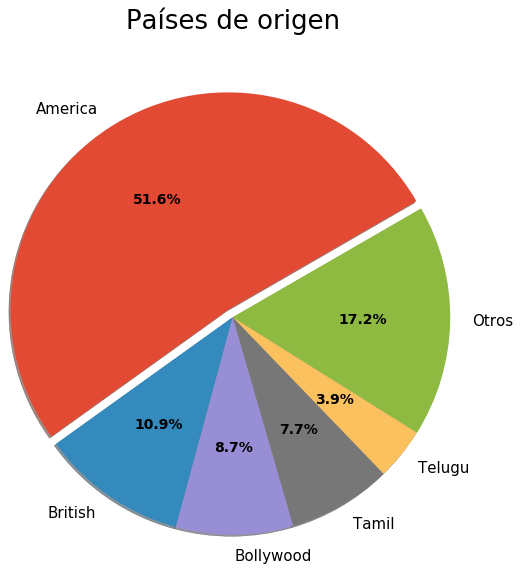

In [6]:
counts = []
for i in range(5):
    counts.append(df['Origin/Ethnicity'].value_counts()[i])
    
countries = ["America", "British", "Bollywood", "Tamil", "Telugu", "Otros"]

counts.append(sum(df['Origin/Ethnicity'].value_counts()[6:]))

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(counts, explode=(0.1, 0, 0, 0, 0, 0), labels=countries, autopct='%1.1f%%',
                      shadow=True, radius=2.5, startangle=30)
ax.set_title('Países de origen', fontsize=26, loc="center",  y=1.8)
plt.setp(texts, size=15)
plt.setp(autotexts, size=14, weight="bold")

### Número de películas por año

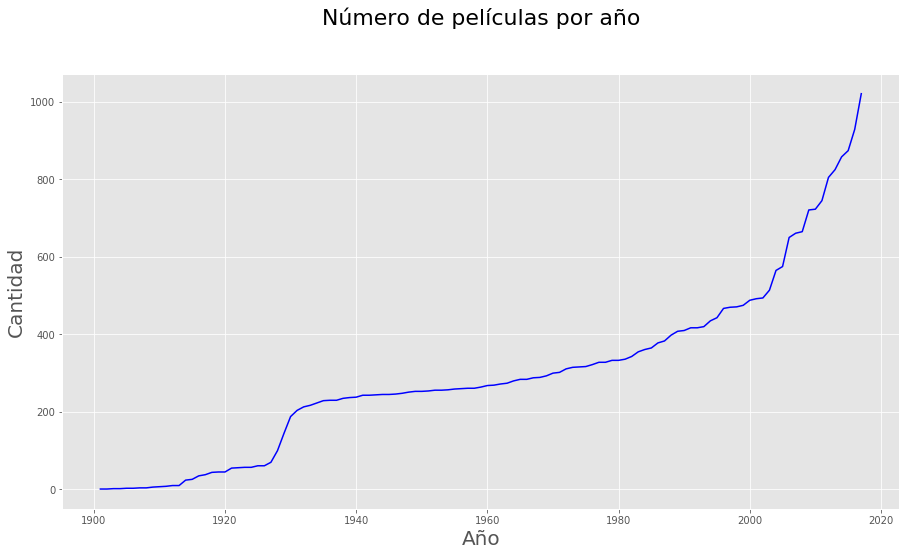

In [7]:
plt.figure(figsize=(15,8))
plt.title('Número de películas por año', fontsize=22, y=1.1)
plt.xlabel('Año', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)
ax = plt.plot(df['Release Year'].unique()[::-1], df['Release Year'].value_counts(), 'b-')

Géneros

In [8]:
len(df['Genre'].unique())

2265

Hay demasiados generos

Text(0, 0.5, 'Número de ocurrencias')

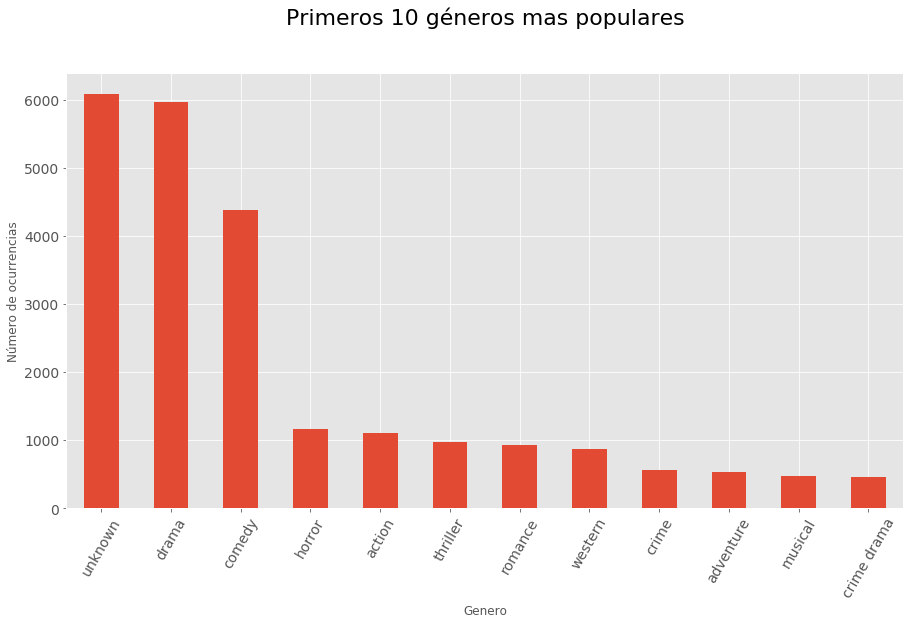

In [9]:
ax = df['Genre'].value_counts().head(12).plot(kind='bar', figsize=(15,8), fontsize=14)
ax.set_title('Primeros 10 géneros mas populares', size=22, y=1.1)
plt.xticks(rotation=60)
plt.xlabel('Genero')
plt.ylabel('Número de ocurrencias')

### Algunos ejemplos de tramas

In [10]:
print("{} - {}".format(df['Title'][342],df['Release Year'][342]))
print("")
print(df['Plot'][342])

Old Lady 31 - 1920

Based upon a summary of the plot in a review in a film publication,[3] Angie (Dunn) and Abe (Harmon) have been married for many years when bad investments force them to sell their homestead. Angie is to go to the old ladies' home while Abe is to go to live on the poor farm. When the twenty-nine inmates of the old ladies' home see how hard it is for the couple to part, they agree to take Abe in, and he is listed on their roster as "Old Lady 31." There are several comic situations as Abe wins his way into the hearts of his female companions. When some apparently worthless mining stock is found to have some value, the couple are able to return to their home.


In [11]:
print("{} - {}".format(df['Title'][7347],df['Release Year'][7347]))
print("")
print(df['Plot'][7347])

Five Guns to Tombstone - 1960

Young outlaw Billy Wade, determined to reform, is roped into a robbery by rich businessman George Landon, then framed for it. Billy's brother Matt is sprung from prison by Landon on the condition he get Billy to go along with the theft. During a struggle for a gun, Matt is accidentally killed and his teenaged son Ted and others mistakenly believe Billy killed him in cold blood. Billy pretends to help bandit Ike Garvey but ultimately assists in his capture, earning Ted's forgiveness.


In [12]:
print("{} - {}".format(df['Title'][5],df['Release Year'][5]))
print("")
print(df['Plot'][5])

Alice in Wonderland - 1903

Alice follows a large white rabbit down a "Rabbit-hole". She finds a tiny door. When she finds a bottle labeled "Drink me", she does, and shrinks, but not enough to pass through the door. She then eats something labeled "Eat me" and grows larger. She finds a fan when enables her to shrink enough to get into the "Garden" and try to get a "Dog" to play with her. She enters the "White Rabbit's tiny House," but suddenly resumes her normal size. In order to get out, she has to use the "magic fan."
She enters a kitchen, in which there is a cook and a woman holding a baby. She persuades the woman to give her the child and takes the infant outside after the cook starts throwing things around. The baby then turns into a pig and squirms out of her grip. "The Duchess's Cheshire Cat" appears and disappears a couple of times to Alice and directs her to the Mad Hatter's "Mad Tea-Party." After a while, she leaves.
The Queen invites Alice to join the "ROYAL PROCESSION": a p

### Formato de los textos

In [13]:
print("{} - {}".format(df['Title'][12],df['Release Year'][12]))
print("")
text = df['Plot'][12]
text

Kathleen Mavourneen - 1906



'Irish villager Kathleen is a tenant of Captain Clearfield, who controls local judges and criminals. Her father owes Clearfield a large debt. Terence O\'More saves the village from Clearfield, causing a large celebration.\r\nFilm historian Charles Musser writes of Porter\'s adaptation, "O\'More not only rescues Kathleen from the villain but, through marriage, renews the family for another generation."[1]'

In [14]:
text = re.sub(r"\'s", "", text)
text = re.sub(r"\r\n", " ", text)
text = re.sub(r"\[\d+\]", "", text)
text

'Irish villager Kathleen is a tenant of Captain Clearfield, who controls local judges and criminals. Her father owes Clearfield a large debt. Terence O\'More saves the village from Clearfield, causing a large celebration. Film historian Charles Musser writes of Porter adaptation, "O\'More not only rescues Kathleen from the villain but, through marriage, renews the family for another generation."'